## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
"""
Your code here
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [3]:
import os
import keras

# Try to enable GPU (optional)
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [13]:
train, test = keras.datasets.cifar10.load_data()

In [21]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
        x = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)) * 2 - 1
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [22]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [25]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)                2080      
__________

In [26]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [27]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [28]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.7369 - acc: 0.3811 - val_loss: 1.5427 - val_acc: 0.4477
Epoch 2/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.4907 - acc: 0.4725 - val_loss: 1.4647 - val_acc: 0.4810
Epoch 3/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.3654 - acc: 0.5182 - val_loss: 1.4454 - val_acc: 0.5008
Epoch 4/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.2749 - acc: 0.5487 - val_loss: 1.3996 - val_acc: 0.5108
Epoch 5/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.1751 - acc: 0.5857 - val_loss: 1.3571 - val_acc: 0.5279
Epoch 6/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.0922 - acc: 0.6137 - val_loss: 1.3771 - val_acc: 0.5283
Epoch 7/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.0162 - acc: 0.6417 - val_loss: 1.3768 -

50000/50000 [==============================] - 3s 54us/step - loss: 0.0830 - acc: 0.9741 - val_loss: 3.3113 - val_acc: 0.5449
Epoch 60/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.0699 - acc: 0.9771 - val_loss: 3.5573 - val_acc: 0.5372
Epoch 61/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.0742 - acc: 0.9765 - val_loss: 3.4640 - val_acc: 0.5421
Epoch 62/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.0756 - acc: 0.9760 - val_loss: 3.5373 - val_acc: 0.5456
Epoch 63/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.0741 - acc: 0.9768 - val_loss: 3.4221 - val_acc: 0.5523
Epoch 64/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.0730 - acc: 0.9768 - val_loss: 3.3992 - val_acc: 0.5432
Epoch 65/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.0756 - acc: 0.9753 - val_loss: 3.4311 - val_acc: 0.5448
Epoch 66/100
50000/50000 [==============

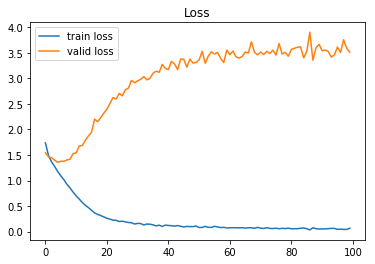

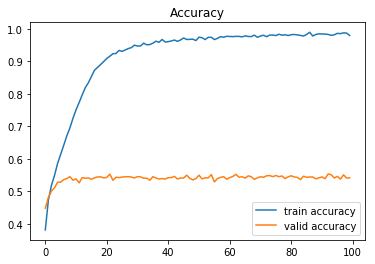

In [30]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()